<h1><font color="green"> Data Analysis on CWC 2023 </font></h1>

<h2> By Saksham</h2><br>
<img src="https://resources.pulse.icc-cricket.com/photo-resources/2023/04/02/a955aab1-e98b-4596-a928-0f5e73ee4248/india-2023-logo.PNG?width=985&amp;height=580" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 985px; height: 284px; margin: 55px 0px; width: 482px;" alt="India 2023 brand launched 12 years to the day of CWC 2011 triumph" jsname="kn3ccd" aria-hidden="false"/>


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport



In [55]:
balls = pd.read_csv("deliveries.csv")
 
mat = pd.read_csv("matches.csv")
pt = pd.read_csv("points_table.csv")
pt.shape

(10, 11)

In [56]:
balls.shape

(26119, 22)

In [57]:
mat.shape

(48, 18)

In [58]:
mat.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [59]:
balls.tail()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
26114,45,2023,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.1,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26115,45,2023,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.2,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26116,45,2023,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.3,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26117,45,2023,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.4,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26118,45,2023,12-11-2023,"M Chinnaswamy Stadium, Bengaluru",2,47.5,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,caught,AT Nidamanuru,NaN,NaN


In [60]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       10 non-null     int64  
 1   Team          10 non-null     object 
 2   Matches       10 non-null     int64  
 3   Won           10 non-null     int64  
 4   Lost          10 non-null     int64  
 5   Tie           10 non-null     int64  
 6   No Results    10 non-null     int64  
 7   Points        10 non-null     int64  
 8   Net Run Rate  10 non-null     float64
 9   For           10 non-null     object 
 10  Against       10 non-null     object 
dtypes: float64(1), int64(7), object(3)
memory usage: 1012.0+ bytes


In [61]:
pd.isnull(balls).sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     25454
noballs                   26063
byes                      26081
legbyes                   25926
penalty                   26118
wicket_type               25390
player_dismissed          25390
other_wicket_type         26118
other_player_dismissed    26118
dtype: int64

In [62]:
pd.isnull(mat).sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     0
umpire1             0
umpire2             0
reserve_umpire      1
match_referee       0
winner              0
winner_runs        24
winner_wickets     24
match_type          0
dtype: int64

In [63]:
mat['winner_runs']=mat['winner_runs'].fillna(0)
mat['winner_wickets']=mat['winner_wickets'].fillna(0)
mat['reserve_umpire']=mat['reserve_umpire'].fillna(0)

In [64]:
pd.isnull(pt).sum()

Ranking         0
Team            0
Matches         0
Won             0
Lost            0
Tie             0
No Results      0
Points          0
Net Run Rate    0
For             0
Against         0
dtype: int64

In [65]:
balls.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [66]:
mat.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

In [67]:
pt.columns

Index(['Ranking', 'Team', 'Matches', 'Won', 'Lost', 'Tie', 'No Results',
       'Points', 'Net Run Rate', 'For', 'Against'],
      dtype='object')

In [68]:
balls['wides']=balls['wides'].fillna(0)
balls['noballs']=balls['noballs'].fillna(0)
balls['byes']=balls['byes'].fillna(0)
balls['penalty']=balls['penalty'].fillna(0)
balls['legbyes']=balls['legbyes'].fillna(0)
balls['other_player_dismissed']=balls['other_player_dismissed'].fillna(0)
balls['wicket_type']=balls['wicket_type'].fillna(0)
balls['player_dismissed']=balls['player_dismissed'].fillna(0)
balls['other_wicket_type']=balls['other_wicket_type'].fillna(0)

In [69]:
balls.isnull().sum()

match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
dtype: int64

In [70]:
balls.shape[0]

26119

In [71]:
types =pt['Won'].value_counts()
types.reset_index

<bound method Series.reset_index of Won
2    3
7    2
4    2
9    1
5    1
3    1
Name: count, dtype: int64>

[]

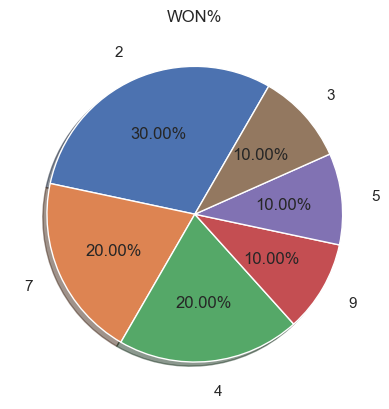

In [72]:
plt.pie(types.values,labels=types.index,labeldistance=1.2,autopct='%1.2f%%',shadow=True,startangle=60)
plt.title("WON%")
plt.plot()

In [73]:
mat.head(2)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,0.0,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,0.0,Group


<h1>Find how many matches won by india </h2>
<img src="https://www.poornima.edu.in/wp-content/uploads/2023/10/india-cricket-team-world-cup-2023_e887a01ff.jpg" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 800px; height: 321px; margin: 36.5px 0px; width: 482px;" alt="India Cricket Team World Cup 2023 - Top | Best University in Jaipur |  Rajasthan | Poornima University" jsname="kn3ccd" aria-hidden="false">

In [74]:
mat[(mat["winner"]=="India") & (mat["season"]=="2023/24")]

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,0.0,6.0,Group
8,2023/24,Afghanistan,India,2023/10/11,9,Arun Jaitley Stadium,Delhi,Afghanistan,bat,RG Sharma,MA Gough,PR Reiffel,Sharfuddoula,JJ Crowe,India,0.0,8.0,Group
11,2023/24,Pakistan,India,2023/10/14,12,Narendra Modi Stadium,Ahmedabad,India,field,JJ Bumrah,M Erasmus,RK Illingworth,CB Gaffaney,AJ Pycroft,India,0.0,7.0,Group
16,2023/24,Bangladesh,India,2023/10/19,17,Maharashtra Cricket Association Stadium,Pune,Bangladesh,bat,V Kohli,AT Holdstock,RA Kettleborough,M Erasmus,AJ Pycroft,India,0.0,7.0,Group
20,2023/24,New Zealand,India,2023/10/22,21,Himachal Pradesh Cricket Association Stadium,Dharamsala,India,field,Mohammed Shami,AT Holdstock,MA Gough,Praveen Sen,AJ Pycroft,India,0.0,4.0,Group
28,2023/24,India,England,2023/10/29,29,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,England,field,RG Sharma,AT Holdstock,RJ Tucker,CM Brown,RB Richardson,India,100.0,0.0,Group
32,2023/24,India,Sri Lanka,2023/11/02,33,Wankhede Stadium,Mumbai,Sri Lanka,field,Mohammed Shami,CM Brown,PR Reiffel,RK Illingworth,JJ Crowe,India,302.0,0.0,Group
36,2023/24,India,South Africa,2023/11/05,37,Eden Gardens,Kolkata,India,bat,V Kohli,HDPK Dharmasena,PR Reiffel,AG Wharf,AJ Pycroft,India,243.0,0.0,Group
44,2023/24,India,Netherlands,2023/11/12,45,M Chinnaswamy Stadium,Bengaluru,India,bat,SS Iyer,CB Gaffaney,MA Gough,CM Brown,RB Richardson,India,160.0,0.0,Group
45,2023/24,India,New Zealand,2023/11/15,46,Wankhede Stadium,Mumbai,India,bat,Mohammed Shami,RK Illingworth,RJ Tucker,AT Holdstock,AJ Pycroft,India,70.0,0.0,Semi Final


<h2>find out the match where SS Iyer became the man of the match ?</h2>

In [75]:
mat[(mat["winner"]=="India") & (mat["player_of_match"]=="SS Iyer")]

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
44,2023/24,India,Netherlands,2023/11/12,45,M Chinnaswamy Stadium,Bengaluru,India,bat,SS Iyer,CB Gaffaney,MA Gough,CM Brown,RB Richardson,India,160.0,0.0,Group


<h3>get all the matches where toss is won by India? </h3>

In [76]:
mat[(mat["toss_winner"]=="India")]

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
11,2023/24,Pakistan,India,2023/10/14,12,Narendra Modi Stadium,Ahmedabad,India,field,JJ Bumrah,M Erasmus,RK Illingworth,CB Gaffaney,AJ Pycroft,India,0.0,7.0,Group
20,2023/24,New Zealand,India,2023/10/22,21,Himachal Pradesh Cricket Association Stadium,Dharamsala,India,field,Mohammed Shami,AT Holdstock,MA Gough,Praveen Sen,AJ Pycroft,India,0.0,4.0,Group
36,2023/24,India,South Africa,2023/11/05,37,Eden Gardens,Kolkata,India,bat,V Kohli,HDPK Dharmasena,PR Reiffel,AG Wharf,AJ Pycroft,India,243.0,0.0,Group
44,2023/24,India,Netherlands,2023/11/12,45,M Chinnaswamy Stadium,Bengaluru,India,bat,SS Iyer,CB Gaffaney,MA Gough,CM Brown,RB Richardson,India,160.0,0.0,Group
45,2023/24,India,New Zealand,2023/11/15,46,Wankhede Stadium,Mumbai,India,bat,Mohammed Shami,RK Illingworth,RJ Tucker,AT Holdstock,AJ Pycroft,India,70.0,0.0,Semi Final


In [77]:
mat[(mat['season']=='2023/24') & (mat['match_type']=='group') | (mat['umpire1']=='M Erasmus')]

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
11,2023/24,Pakistan,India,2023/10/14,12,Narendra Modi Stadium,Ahmedabad,India,field,JJ Bumrah,M Erasmus,RK Illingworth,CB Gaffaney,AJ Pycroft,India,0.0,7.0,Group
26,2023/24,Australia,New Zealand,2023/10/28,27,Himachal Pradesh Cricket Association Stadium,Dharamsala,New Zealand,field,TM Head,M Erasmus,Sharfuddoula,MA Gough,AJ Pycroft,Australia,5.0,0.0,Group
37,2023/24,Sri Lanka,Bangladesh,2023/11/06,38,Arun Jaitley Stadium,Delhi,Bangladesh,field,Shakib Al Hasan,M Erasmus,RK Illingworth,AT Holdstock,RB Richardson,Bangladesh,0.0,3.0,Group


In [78]:
mat['winner'].nunique() #for counting
mat['winner'].unique() #for returning array

array(['New Zealand', 'Pakistan', 'Bangladesh', 'South Africa', 'India',
       'England', 'Afghanistan', 'Australia', 'Netherlands', 'Sri Lanka'],
      dtype=object)

<h2> ON balls dataset</h2>

In [79]:
balls.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1,2023,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [80]:
balls[(balls['season']=='2023/24') & (balls['runs_off_bat']=='6') | (balls['batting_team']=='England')]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1,2023,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1,2023,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,1,2023,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,2023,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23460,44,2023,11-11-2023,"Eden Gardens, Kolkata",1,49.2,England,Pakistan,DJ Willey,CR Woakes,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
23461,44,2023,11-11-2023,"Eden Gardens, Kolkata",1,49.3,England,Pakistan,DJ Willey,CR Woakes,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
23462,44,2023,11-11-2023,"Eden Gardens, Kolkata",1,49.4,England,Pakistan,DJ Willey,CR Woakes,...,0,0.0,0.0,0.0,0.0,0.0,caught,DJ Willey,0,0
23463,44,2023,11-11-2023,"Eden Gardens, Kolkata",1,49.5,England,Pakistan,AAP Atkinson,CR Woakes,...,0,0.0,0.0,0.0,0.0,0.0,bowled,AAP Atkinson,0,0


In [81]:
balls['byes'].unique()

array([0., 4., 1., 2., 3.])

In [82]:
balls['wides'].nunique()

5

In [83]:
balls['wides'].unique()

array([0., 1., 3., 5., 2.])

In [84]:
mat.head(2)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,0.0,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,0.0,Group


<h3>find out the matches where toss winner is not the match winner
       <br> and where the toss winner is the match winner ?</h3> 

In [85]:
# where the toss winner  is the looser
mat[(mat['season']=='2023/24') &(mat['toss_winner'] != mat['winner'])]

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,0.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,0.0,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,0.0,6.0,Group
5,2023/24,New Zealand,Netherlands,2023/10/09,6,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,MJ Santner,PR Reiffel,RJ Tucker,Nitin Menon,AJ Pycroft,New Zealand,99.0,0.0,Group
6,2023/24,England,Bangladesh,2023/10/10,7,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,DJ Malan,Ahsan Raza,P Wilson,HDPK Dharmasena,J Srinath,England,137.0,0.0,Group
7,2023/24,Sri Lanka,Pakistan,2023/10/10,8,Rajiv Gandhi International Stadium,Hyderabad,Sri Lanka,bat,Mohammad Rizwan,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Pakistan,0.0,6.0,Group
8,2023/24,Afghanistan,India,2023/10/11,9,Arun Jaitley Stadium,Delhi,Afghanistan,bat,RG Sharma,MA Gough,PR Reiffel,Sharfuddoula,JJ Crowe,India,0.0,8.0,Group
9,2023/24,South Africa,Australia,2023/10/12,10,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Australia,field,Q de Kock,JS Wilson,RK Illingworth,CM Brown,J Srinath,South Africa,134.0,0.0,Group
12,2023/24,Afghanistan,England,2023/10/15,13,Arun Jaitley Stadium,Delhi,England,field,Mujeeb Ur Rahman,RJ Tucker,Sharfuddoula,P Wilson,JJ Crowe,Afghanistan,69.0,0.0,Group
13,2023/24,Sri Lanka,Australia,2023/10/16,14,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Sri Lanka,bat,A Zampa,CB Gaffaney,JS Wilson,0,RB Richardson,Australia,0.0,5.0,Group


In [86]:
# the toss winner is the real winner
mat[(mat['season']=='2023/24') &(mat['toss_winner'] == mat['winner'])]

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,0.0,9.0,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,0.0,6.0,Group
10,2023/24,Bangladesh,New Zealand,2023/10/13,11,MA Chidambaram Stadium,Chennai,New Zealand,field,LH Ferguson,HDPK Dharmasena,Nitin Menon,AG Wharf,RB Richardson,New Zealand,0.0,8.0,Group
11,2023/24,Pakistan,India,2023/10/14,12,Narendra Modi Stadium,Ahmedabad,India,field,JJ Bumrah,M Erasmus,RK Illingworth,CB Gaffaney,AJ Pycroft,India,0.0,7.0,Group
20,2023/24,New Zealand,India,2023/10/22,21,Himachal Pradesh Cricket Association Stadium,Dharamsala,India,field,Mohammed Shami,AT Holdstock,MA Gough,Praveen Sen,AJ Pycroft,India,0.0,4.0,Group
22,2023/24,South Africa,Bangladesh,2023/10/24,23,Wankhede Stadium,Mumbai,South Africa,bat,Q de Kock,Ahsan Raza,JS Wilson,KN Ananthapadmanabhan,JJ Crowe,South Africa,149.0,0.0,Group
23,2023/24,Australia,Netherlands,2023/10/25,24,Arun Jaitley Stadium,Delhi,Australia,bat,GJ Maxwell,MA Gough,Sharfuddoula,Nitin Menon,AJ Pycroft,Australia,309.0,0.0,Group
27,2023/24,Netherlands,Bangladesh,2023/10/28,28,Eden Gardens,Kolkata,Netherlands,bat,PA van Meekeren,JS Wilson,P Wilson,CB Gaffaney,JJ Crowe,Netherlands,87.0,0.0,Group
29,2023/24,Sri Lanka,Afghanistan,2023/10/30,30,Maharashtra Cricket Association Stadium,Pune,Afghanistan,field,Fazalhaq Farooqi,CB Gaffaney,RK Illingworth,M Erasmus,J Srinath,Afghanistan,0.0,7.0,Group
34,2023/24,New Zealand,Pakistan,2023/11/04,35,M Chinnaswamy Stadium,Bengaluru,Pakistan,field,Fakhar Zaman,P Wilson,RA Kettleborough,JS Wilson,RB Richardson,Pakistan,21.0,0.0,Group


<h3> analysing points table using graphs</h3>

In [87]:
pt.columns

Index(['Ranking', 'Team', 'Matches', 'Won', 'Lost', 'Tie', 'No Results',
       'Points', 'Net Run Rate', 'For', 'Against'],
      dtype='object')

<Axes: xlabel='Won', ylabel='count'>

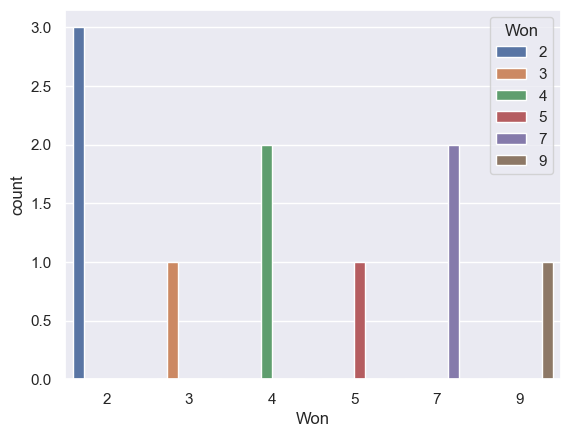

In [88]:
sns.set()
sns.countplot(x='Won',data=pt,hue='Won')

<Axes: xlabel='Lost', ylabel='count'>

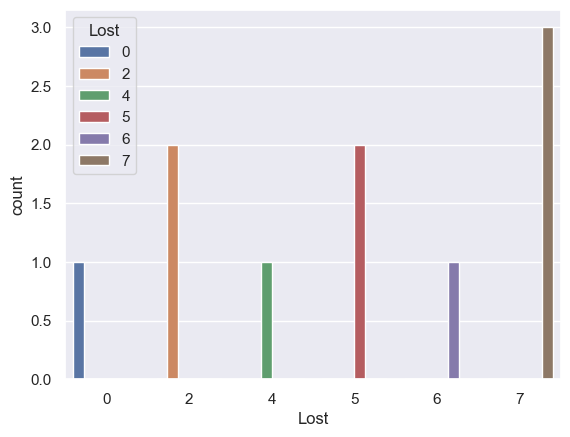

In [89]:
sns.set()
sns.countplot(x='Lost',data=pt,hue='Lost')

<Axes: xlabel='Points', ylabel='count'>

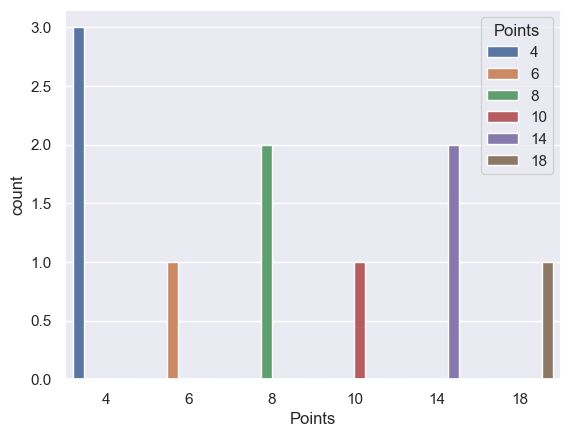

In [90]:
sns.set()
sns.countplot(x='Points',data=pt,hue='Points')

<function matplotlib.pyplot.show(close=None, block=None)>

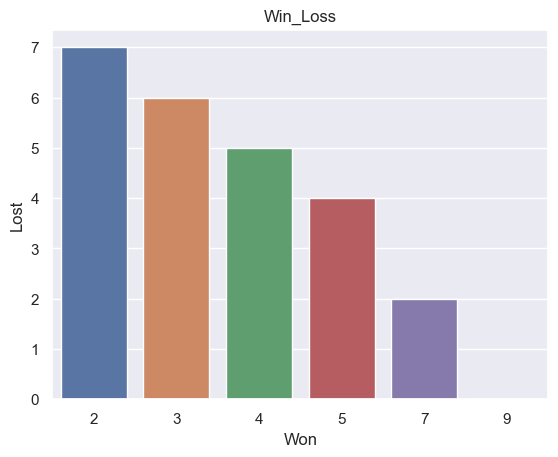

In [91]:
plt.figure()
sns.barplot(x='Won',y='Lost',data=pt)
plt.title("Win_Loss")
plt.show

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X=pt[["Points"]]
y=pt[["Net Run Rate"]]

In [93]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train)

   Points
5       8
0      18
7       4
2      14
9       4
4       8
3      10
6       6


In [94]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=model.predict(X_test)
print(y_pred)

[[-1.31910714]
 [ 1.35285714]]


In [96]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


In [97]:
print(f'mean_squared_error(MSE): {mse}')
print(f'r-squared: {r2}')

mean_squared_error(MSE): 0.009208158801020435
r-squared: 0.9948718206721874


In [98]:
pt=pt.drop(['Team'],axis=1)
pt=pt.drop(['For'],axis=1)
pt=pt.drop(['Against'],axis=1)
        
correlation_matrix=pt.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Ranking  Matches       Won      Lost  Tie  No Results  \
Ranking       1.000000      NaN -0.961910  0.961910  NaN         NaN   
Matches            NaN      NaN       NaN       NaN  NaN         NaN   
Won          -0.961910      NaN  1.000000 -1.000000  NaN         NaN   
Lost          0.961910      NaN -1.000000  1.000000  NaN         NaN   
Tie                NaN      NaN       NaN       NaN  NaN         NaN   
No Results         NaN      NaN       NaN       NaN  NaN         NaN   
Points       -0.961910      NaN  1.000000 -1.000000  NaN         NaN   
Net Run Rate -0.977434      NaN  0.973076 -0.973076  NaN         NaN   

                Points  Net Run Rate  
Ranking      -0.961910     -0.977434  
Matches            NaN           NaN  
Won           1.000000      0.973076  
Lost         -1.000000     -0.973076  
Tie                NaN           NaN  
No Results         NaN           NaN  
Points        1.000000      0.973076  
Net Run Rate  0.97

<h1> TRYING to predict ball by ball predicton using scikit learn</h1>

In [99]:



balls['runs_off_bat'] = balls['runs_off_bat'].astype(int)
balls = balls.drop(['batting_team'], axis=1)
balls = balls.drop(['bowler'], axis=1)
balls = balls.drop(['striker'], axis=1)
balls = balls.drop(['penalty'], axis=1)
balls = balls.drop(['non_striker'], axis=1)
balls = balls.drop(['bowling_team'], axis=1)
balls = balls.drop(['start_date'], axis=1)
#balls = balls.drop(['runs_off_bat'], axis=1)
balls = balls.drop(['player_dismissed'], axis=1)
balls = balls.drop(['other_wicket_type'], axis=1)
balls = balls.drop(['wicket_type'], axis=1)
balls = balls.drop(['other_player_dismissed'], axis=1)
balls = balls.drop(['venue'], axis=1)
#balls = balls.drop(['start_date'],axis=1)
# Split data into features (X) and target variable (y)
X = balls.drop('runs_off_bat', axis=1)
y = balls['runs_off_bat']


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(max_iter=100, random_state=42)
model.fit(X_train, y_train)


HistGradientBoostingClassifier(random_state=42)

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5371362940275651
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.92      0.69      2788
           1       0.44      0.16      0.23      1612
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00        16
           4       0.33      0.00      0.00       454
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00       134

    accuracy                           0.54      5224
   macro avg       0.19      0.15      0.13      5224
weighted avg       0.46      0.54      0.44      5224

Confusion Matrix:


c:\python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

[[2555  208    0    2    2   21    0]
 [1352  250    0    0    0   10    0]
 [ 189   30    0    0    0    1    0]
 [  15    1    0    0    0    0    0]
 [ 406   45    0    0    1    2    0]
 [   0    0    0    0    0    0    0]
 [ 106   28    0    0    0    0    0]]


In [103]:
# Assuming 'new_data.csv' is the new ball-by-ball data you want to predict
new_data = pd.read_csv('deliveries.csv')

# Preprocess the new data (ensure it has the same features as the training data)
new_data = new_data.drop(['batting_team'], axis=1)
new_data = new_data.drop(['bowler'], axis=1)
new_data = new_data.drop(['striker'], axis=1)
new_data = new_data.drop(['penalty'], axis=1)
new_data = new_data.drop(['non_striker'], axis=1)
new_data = new_data.drop(['bowling_team'], axis=1)
new_data = new_data.drop(['start_date'], axis=1)
new_data = new_data.drop(['runs_off_bat'], axis=1)
new_data = new_data.drop(['player_dismissed'], axis=1)
new_data = new_data.drop(['other_wicket_type'], axis=1)
new_data = new_data.drop(['wicket_type'], axis=1)
new_data = new_data.drop(['other_player_dismissed'], axis=1)
new_data = new_data.drop(['venue'], axis=1)

# Predict
predictions = model.predict(new_data)
print("Predictions:", predictions)


Predictions: [0 0 0 ... 1 1 0]


In [104]:
profile = ProfileReport(balls)
profile.to_file(output_file="balls.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
profile = ProfileReport(mat)
profile.to_file(output_file="mat.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
profile = ProfileReport(pt)
profile.to_file(output_file="pt.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h1>Thank you for your support &#128526; &#128578; </h1>